<img src="header_escom26.jpg" alt="header" style="height:200px;">

# Práctica 8:  Greedy - Planificador de procesos</br>
# Ibarra Soto Alejandro
# 2015080672

**Análisis de Algoritmos** </br>
**Profesor: Dr. Flavio Arturo Sánchez Garfias** </br>
**3CM2**

<h1>Planificador de procesos</h1>
El planificador de procesos (process scheduler, en inglés) es la parte del sistema operativo que se encarga de seleccionar a qué proceso se asigna el recurso procesador y durante cuánto tiempo.
El planificador de procesos tiene como funciones principales:
<ul>
<li>Llevar el control del estado de cada proceso.
<li>Decidir qué proceso usará el procesador y durante cuánto tiempo, para ello empleará un cierto criterio en base al cual tomará las decisiones. Si implementa multiprogramación, deberá emplear un criterio que evite que un proceso monopolice el procesador.
<li>Asignar el procesador al proceso, restableciendo el contexto de la ejecución del proceso por donde fuere. El contexto de la ejecución se encuentra almacenado en el PCB del proceso asignado.
<li>Retirar el procesador al proceso, salvando el contexto de la ejecución del proceso, para poder restablecerlo posteriormente una vez que vuelva a ser asignado. El contexto de la ejecución se almacenará en el PCB del proceso retirado.
El planificador de procesos es software, por tanto, requiere emplear el recurso procesador para ejecutar su código.</br>
Existen diferente métodos para ordenarlo, sin embargo, en esta práctica no se consideran mecanismos expropiativos, sino que se realiza como se muestra a continuación.

<h2>Método de fuerza bruta</h2>
El método de fuerza bruta consiste en sacar todas las permutaciones que existen, es decir, todas las formas en que se pueden ordenar los procesos y una vez que se tienen se calcula el tiempo de espera de cada uno y se escoge aquella permutación que permita tener el menor tiempo de espera para todos y cada uno de los diferentes procesos a ordenar.
<center><img src="i1.png"></center></br>
Una vez que se tienen todas las permutaciones, se prueba cada una de ellas y al final se muestra la que ofrecio el menor tiempo de espera para todos los procesos.
<h2>Método de algoritmo greedy</h2>
Este método consiste en ordenar todos los proceso con base en el tiempo en que se ejecutan, de menor a mayor, pues de esta manera se elimina el tiempo mayor y no se considera como de espera, y al demostrarlo por inducción matemática, al eliminar un proceso se tendría que sacar el minimo tiempo de espera de los procesos restantes, lo cual se obtiene otra vez al dejar hasta el final al proceso cuyo tiempo es mayor, así, los demás procesos no esperaran, dicha resolución se puede observar a continuación.
<center><img src="i2.png"></center></br>

Import packages <a href="https://numpy.org">Numpy</a> and <a href="https://matplotlib.org">Matplotlib</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

**Definir funciones de ordenamiento**

In [2]:
def mergeSort(arr,ini,fin,pos): #pos 0 es para ordenar el primer elemento, 1 para ordenar el segundo
    if(pos!=0 and pos!=1):
        pos=1
    if ini<fin:
        mitad = int((ini+(fin))/2)
        #Ordenar la primera mitad del arreglo
        mergeSort(arr,ini,mitad,pos)
        #Ordenar la segunda mitad del arreglo
        mergeSort(arr,mitad+1,fin,pos)
        #Ordenar todo el arreglo
        merge(arr,ini,mitad,fin,pos)

def merge(arr,ini,mitad,fin,pos):
    #Obtener el tamaño de los dos subarreglos
    n1 = mitad-ini+1
    n2 = fin-mitad 
    #Crear los dos subarreglos
    #arrInicio = [0] * (n1)
    #arrFin = [0] * (n2) 
    arrInicio = np.zeros((n1,2))
    arrFin = np.zeros((n2,2))
    #Copiar los datos a los subarreglos
    for i in range(n1): 
        arrInicio[i,0]=arr[ini+i,0]
        arrInicio[i,1]=arr[ini+i,1]
    for j in range(n2): 
        arrFin[j,0]=arr[mitad+j+1,0]
        arrFin[j,1]=arr[mitad+j+1,1]
    i = 0 
    j = 0 
    k = ini
    #Ordenar los dos subarreglos en el arreglo inicial
    while i < n1 and j < n2 : 
        if arrInicio[i,pos]<=arrFin[j,pos]: 
            arr[k,0] = arrInicio[i,0]
            arr[k,1] = arrInicio[i,1] 
            i=i+1
        else: 
            arr[k,0]=arrFin[j,0] 
            arr[k,1]=arrFin[j,1] 
            j=j+1
        k=k+1
    #Copiar los elementos que sobraron en los dos subarreglos
    while i<n1: 
        arr[k,0]=arrInicio[i,0]
        arr[k,1]=arrInicio[i,1]
        i=i+1
        k=k+1
    while j<n2: 
        arr[k,0] = arrFin[j,0]
        arr[k,1] = arrFin[j,1] 
        j=j+1
        k=k+1
        
def mergeSortArr(arr,ini,fin):
    if ini<fin:
        mitad = int((ini+(fin))/2)
        #Ordenar la primera mitad del arreglo
        mergeSortArr(arr,ini,mitad)
        #Ordenar la segunda mitad del arreglo
        mergeSortArr(arr,mitad+1,fin)
        #Ordenar todo el arreglo
        mergeArr(arr,ini,mitad,fin)

def mergeArr(arr,ini,mitad,fin):
    #Obtener el tamaño de los dos subarreglos
    n1 = mitad-ini+1
    n2 = fin-mitad 
    #Crear los dos subarreglos
    arrInicio = [0] * (n1)
    arrFin = [0] * (n2) 
    #Copiar los datos a los subarreglos
    for i in range(n1): 
        arrInicio[i]=arr[ini+i]
    for j in range(n2): 
        arrFin[j]=arr[mitad+j+1]
    i = 0 
    j = 0 
    k = ini
    #Ordenar los dos subarreglos en el arreglo inicial
    while i < n1 and j < n2 : 
        if arrInicio[i]<=arrFin[j]: 
            arr[k] = arrInicio[i] 
            i=i+1
        else: 
            arr[k]=arrFin[j] 
            j=j+1
        k=k+1
    #Copiar los elementos que sobraron en los dos subarreglos
    while i<n1: 
        arr[k]=arrInicio[i] 
        i=i+1
        k=k+1
    while j<n2: 
        arr[k] = arrFin[j] 
        j=j+1
        k=k+1

**Definir la función de fuerza bruta**

In [3]:
def process_FB(procesos):
    lista=list(itertools.permutations(procesos))
    permutacionOptima=0
    #tiempoOptimo=-1
    tiemposOptimos=[-1]*(len(procesos))
    for i in range(len(lista)):
        tiempos=[0]*(len(procesos))
        for j in range(len(procesos)-1):
            tiempos[j+1]=tiempos[j]+lista[i][j]
        bandera=1
        for j in range(len(procesos)):
            if(tiemposOptimos[j]==-1):
                permutacionOptima=i
                tiemposOptimos=tiempos
                break
            else:
                if(tiemposOptimos[j]<tiempos[j]):
                    bandera=0
                    break;
        if(bandera==1):
            tiemposOptimos=tiempos
            permutacionOptima=i
    print(lista[permutacionOptima])

**Definir la función de algoritmo greedy**

In [4]:
def processPlanning(procesos):
    mergeSortArr(procesos,0,len(procesos)-1)
    print(procesos)

# Pruebas 

A continuación, se crearán arreglos de 10, 100, 1000, 10000, 100000, 1000000 digitos

In [5]:
from time import time
timePD = [0] * (6)
timeDV = [0] * (6)

# Datos de tamaño 10

In [6]:
np.random.seed(101) #THE SEED
tam=10
arr1 = np.random.randint(0,100,tam)
arr1

array([95, 11, 81, 70, 63, 87, 75,  9, 77, 40])

**Fuerza bruta**

In [7]:
start_time = time()
process_FB(arr1)
elapsed_time = time() - start_time
timeDV[0]=elapsed_time

(9, 11, 40, 63, 70, 75, 77, 81, 87, 95)


**Algoritmo greedy**

In [8]:
start_time = time()
processPlanning(arr1)
elapsed_time = time() - start_time
timePD[0]=elapsed_time

[ 9 11 40 63 70 75 77 81 87 95]


# Datos de tamaño 100

In [9]:
np.random.seed(101) #THE SEED
tam=100
arr2 = np.random.randint(0,100,tam)
arr2

array([95, 11, 81, 70, 63, 87, 75,  9, 77, 40,  4, 63, 40, 60, 92, 64,  5,
       12, 93, 40, 49, 83,  8, 29, 59, 34, 44, 72, 19, 10, 76, 95, 87,  0,
       73,  8, 62, 36, 83, 99, 28, 63,  7, 10, 52, 56, 38, 73, 52, 18, 71,
       15, 44,  0, 12, 17, 75, 79, 97, 93, 24, 36, 63, 19, 35, 30, 10, 60,
       20, 27,  8, 86, 26, 87, 46, 47, 54, 86,  9, 45,  2, 18, 58, 92, 11,
       10, 94, 35, 28,  3, 83, 84, 47, 14, 69, 60, 69, 51,  6, 88])

**Fuerza bruta**

In [ ]:
start_time = time()
process_FB(arr2)
elapsed_time = time() - start_time
timeDV[1]=elapsed_time

**Algoritmo greedy**

In [10]:
start_time = time()
processPlanning(arr2)
elapsed_time = time() - start_time
timePD[1]=elapsed_time

[ 0  0  2  3  4  5  6  7  8  8  8  9  9 10 10 10 10 11 11 12 12 14 15 17
 18 18 19 19 20 24 26 27 28 28 29 30 34 35 35 36 36 38 40 40 40 44 44 45
 46 47 47 49 51 52 52 54 56 58 59 60 60 60 62 63 63 63 63 64 69 69 70 71
 72 73 73 75 75 76 77 79 81 83 83 83 84 86 86 87 87 87 88 92 92 93 93 94
 95 95 97 99]


# Datos de tamaño 1000

In [11]:
np.random.seed(101) #THE SEED
tam=1000
arr3 = np.random.randint(0,100,tam)
arr3

array([95, 11, 81, 70, 63, 87, 75,  9, 77, 40,  4, 63, 40, 60, 92, 64,  5,
       12, 93, 40, 49, 83,  8, 29, 59, 34, 44, 72, 19, 10, 76, 95, 87,  0,
       73,  8, 62, 36, 83, 99, 28, 63,  7, 10, 52, 56, 38, 73, 52, 18, 71,
       15, 44,  0, 12, 17, 75, 79, 97, 93, 24, 36, 63, 19, 35, 30, 10, 60,
       20, 27,  8, 86, 26, 87, 46, 47, 54, 86,  9, 45,  2, 18, 58, 92, 11,
       10, 94, 35, 28,  3, 83, 84, 47, 14, 69, 60, 69, 51,  6, 88, 71, 68,
       23, 35, 79, 98, 67, 82, 57, 77, 46,  3, 46, 29, 86, 21, 21, 81, 23,
       94, 71, 20, 27, 75,  5, 49, 86, 89, 63, 82, 77,  3, 56, 14, 49, 87,
       52, 13, 47, 49, 24, 20, 64, 52, 60, 47, 29, 60, 53, 11, 40, 91, 45,
       97, 24, 36, 38,  9, 52, 67, 43,  1, 79, 68, 68, 61, 18, 51, 14, 28,
       17, 87, 46, 52, 16, 70, 71, 84, 10, 62, 96, 57, 23, 86, 85, 26, 76,
       66, 54, 17, 65, 57, 89,  2, 80, 50, 66, 88, 79, 93,  6, 92, 42, 22,
       20, 25, 97, 54, 71, 72, 80, 93, 64, 63, 80, 38, 45, 35, 25, 95, 75,
       72, 11, 76, 79, 50

**Fuerza bruta**

In [ ]:
start_time = time()
process_FB(arr3)
elapsed_time = time() - start_time
timeDV[2]=elapsed_time

**Algoritmo greedy**

In [12]:
start_time = time()
processPlanning(arr3)
elapsed_time = time() - start_time
timePD[2]=elapsed_time

[ 0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  7  7  7  7  7  7
  7  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10
 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12
 12 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17
 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22
 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 24 24 24 24 24 24
 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 27 27 27 27 27
 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
 29 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 32 32 32 32 32 32 32 33
 33 33 33 33 33 33 33 33 34 34 34 34 34 34 34 35 35

# Datos de tamaño 10000

In [13]:
np.random.seed(101) #THE SEED
tam=10000
arr4 = np.random.randint(0,100,tam)
arr4

array([95, 11, 81, ..., 57,  2, 76])

**Fuerza bruta**

In [ ]:
start_time = time()
process_FB(arr4)
elapsed_time = time() - start_time
timeDV[3]=elapsed_time

**Algoritmo greedy**

In [14]:
start_time = time()
processPlanning(arr4)
elapsed_time = time() - start_time
timePD[3]=elapsed_time

[ 0  0  0 ... 99 99 99]


# Datos de tamaño 100000

In [15]:
np.random.seed(101) #THE SEED
tam=100000
arr5 = np.random.randint(0,100,tam)
arr5

array([95, 11, 81, ..., 72, 75, 64])

**Fuerza bruta**

In [ ]:
start_time = time()
process_FB(arr5)
elapsed_time = time() - start_time
timeDV[4]=elapsed_time

**Algoritmo greedy**

In [16]:
start_time = time()
processPlanning(arr5)
elapsed_time = time() - start_time
timePD[4]=elapsed_time

[ 0  0  0 ... 99 99 99]


# Datos de tamaño 1000000

In [17]:
np.random.seed(101) #THE SEED
tam=1000000
arr6 = np.random.randint(0,100,tam)
arr6

array([95, 11, 81, ...,  7, 96, 13])

**Fuerza bruta**

In [ ]:
start_time = time()
process_FB(arr6)
elapsed_time = time() - start_time
timeDV[5]=elapsed_time

**Algoritmo greedy**

In [18]:
start_time = time()
processPlanning(arr6)
elapsed_time = time() - start_time
timePD[5]=elapsed_time

[ 0  0  0 ... 99 99 99]


# Gráficas
**La gráfica con los diferentes tiempos se encuentra a continuación**

**NOTA: La implementación por fuerza bruta no terminaba pasadas 3 horas para 100 datos, es por ellos que se detuvo y se colocó dicho tiempo**

In [19]:
timeDV[1]=10800

In [21]:
print("Método:\t\t10 datos\t100 datos\t1000 datos\t10000 datos\t\t100000 datos\t\t1000000 datos\nGreedy\t\t%.10f"%timePD[0],"\t%.10f" %timePD[1], "\t%.10f" %timePD[2], "\t%.10f" %timePD[3], "\t\t%.10f" %timePD[4], "\t\t%.10f" %timePD[5], "\nFB\t\t%.10f"%timeDV[0],"\t%.5f" %timeDV[1], "\t%.10f" %timeDV[2], "\t%.10f" %timeDV[3], "\t\t%.10f" %timeDV[4], "\t\t%.10f" %timeDV[5])

Método:		10 datos	100 datos	1000 datos	10000 datos		100000 datos		1000000 datos
Greedy		0.0009644032 	0.0000000000 	0.0089755058 	0.0608942509 		0.7131726742 		8.3475859165 
FB		8.4108631611 	10800.00000 	0.0000000000 	0.0000000000 		0.0000000000 		0.0000000000


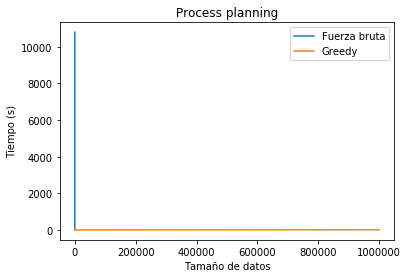

In [24]:
n=[10,100,1000,10000,100000,1000000]
plt.plot(n[:2],timeDV[:2],label="Fuerza bruta")
plt.plot(n,timePD,label="Greedy")

plt.xlabel('Tamaño de datos')
plt.ylabel('Tiempo (s)')

plt.title("Process planning")

plt.legend()

plt.show()

# Conclusiones

Gracias al desarrollo de esta práctica se logró visualizar una aplicación del algoritmo Greedy para obtener el menor tiempo de espera al momento de tener un planificador de procesos, ya que el algoritmo por Fuerza Bruta lo que hace es obtener todas las formas en que se pueden planificar los procesos, y para cada una de ellas se está calculando el tiempo de espera que se tendrá, esto resulta impráctico, pues tal y como lo muestra el algoritmo Greedy, al ir ordenando los procesos con base en el tiempo de ejecución de cada uno de estos, se puede dejr hasta al final al proceso cuya duración es mayor, esto resulta últi, pues al dejar al final al proceso que dura más, significa que todos los demás ya habrían terminado cuando este se ejecute y así, no tuvieron que esperar a que el que dura más terminará, puesto esto incrementaría el tiempo que esperan cada uno de los procesos.
Es importante destacar que los algoritmos Greedy resultan ser una buena opción en los casos convenientes, sin embargo, lo dificil no es determinar el algoritmo o su implementación, lo complicado en muchas ocasiones resulta ser demostrar que efectivamente el algoritmo funciona en todos los casos y no lo hace unicamente en determinadas ocasiones. De cualquier manera, se puede observar que en este caso el algoritmo Greedy resulto ser más eficiente que el desarrollado por fuerza bruta, esto es un reflejo de la agilidad y la rapidez que esta clase de algoritmo puede brindar.